# Music as Data

Eamonn Bell <eamonn.bell@durham.ac.uk>  
Department of Computer Science  
Durham University

Guest lecture for Master of Data Science (Digital Humanities) students   
November 28, 2021

## Goals

- students will understand basic elements of music theory and their correlates in music data
    - tempo
    - pitch
    - intensity (volume)
- students will understand the basic distinction between symbolic and non-symbolic/audio music data
- students will understand the historical context for the collection and manipulation of music data and will have have reflected on the ethical and legal considerations of these activities
- students will be familiar with some popular Python packages useful for the manipulation of music data
- students will be aware of a selection of data sources, know where to look for more data, and have ideas of their own about where and how to collect music data


## Motivation

Just like other fields of cultural production - like text and image - we can study music computationally. 

We might ask questions like this

- how can a large video streaming site detect the use of copyright material in video content, which is uploaded at the rate of 500 hours per minute?

## Prerequisites

- some ideas about the numpy API
- basic Python

## Preliminaries

Some familiar friends

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
%matplotlib inline

Some new acquantainces

In [17]:
import IPython.display as ipd
import librosa
import librosa.display

from ipywebrtc import AudioRecorder, CameraStream

Prepare things for later

In [ ]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)

## Sound is a time series

Sound is moving air. We can measure this moving air with a microphone, which converts sound waves to voltages.

Digital sampling allows us to measure the fluctuation of these voltages, and record a measure of their intensity.

This is all a `.wav` file is.

`librosa` is a useful Python module (developed in the first instance by Brian McFee) that we can use to read a `.wav` file into a Python object.

In [5]:
x, sr = librosa.load('data/ticks.wav')

Before we do anything else, let's listen to it.

In [6]:
ipd.Audio(data=x, rate=sr)

 >❓ What do you hear?

We can use iPython to inspect the documentation for any function in our workspace, by typing the name of the function and pressing `Shift + Tab`.

In [ ]:
librosa.load

We can see that the function `librosa.load` returns a `tuple` (of length 2); this is why we assign each of its members to two names:

- `x` - audio time series
- `sr` - sample rate (in Hz, meaning “samples per second”)

Let's find out more about `x` and `sr`.

In [25]:
type(x), type(sr)

(numpy.ndarray, int)

Since x is a time series, it is easily represented as a `numpy` array. This means we can easily plot it, with `matplotlib`.

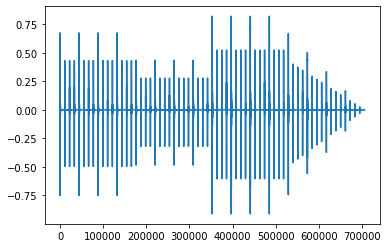

In [8]:
plt.plot(x)
plt.show()

Let's listen again.

In [9]:
ipd.Audio(data=x, rate=sr)

We can look more closely at the first 1000 values with array slicing.

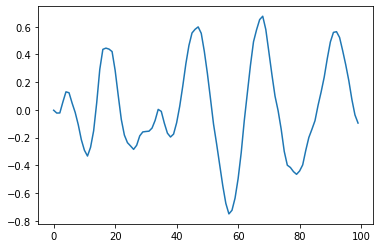

In [15]:
plt.plot(x[:100])
plt.show()

Because the variation of the sound wave is a continuous phenomenon, and digital systems are best at storing discrete data, we represent sound by repeatedly **sampling** a measure of the sound's intensity at a fixed interval. This fixed interval is known known as the **sample rate** (conventionally measured in Hz, or samples per second).

> ! In digital audio, the term “sampling“ has a rather different meaning than in statistics. 

In the plot above, the $x$-axis represents the intensity of a sound wave at sample $i$. The plot shows 100 samples. 

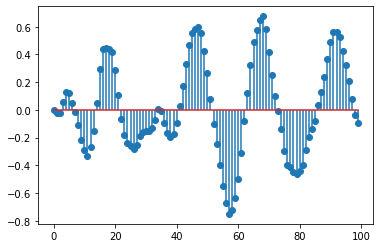

In [14]:
plt.stem(x[:100])
plt.show()

> ❓ What is the total duration of the audio snippet, stored in `x`, in seconds?

In [26]:
x.shape[0] / sr

32.0

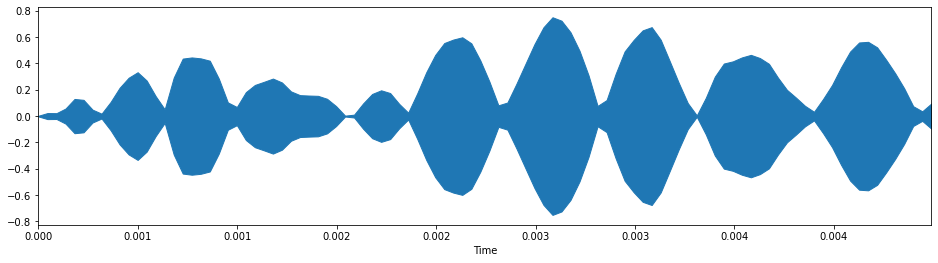

In [18]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x[:100], sr=sr)
plt.show()

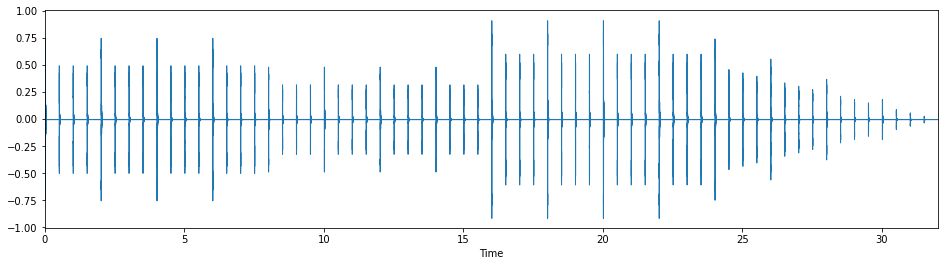

In [19]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [181]:
peak_indexes = scipy.signal.find_peaks(x, height=0.2)[0]

In [182]:
len(peak_indexes)

186

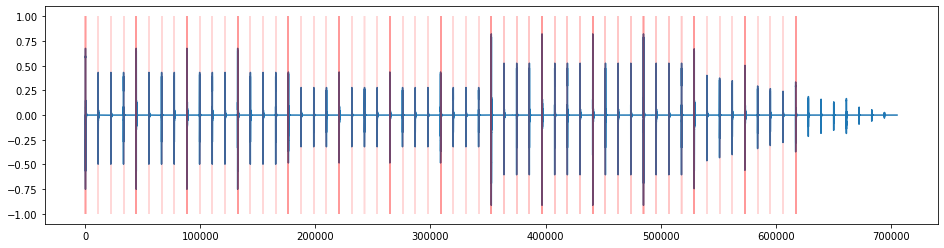

In [183]:
plt.figure(figsize=(16, 4))
plt.plot(x)
plt.vlines(peak_indexes, ymin=-1, ymax=1, colors='r', alpha=0.1)

- https://musicinformationretrieval.com/ipython_audio.html
- click (included)
- get students to detect onsets
- estimate tempo
- "beat"
- segment, sort, and remix

It is conventional to express tempo in the unit “beats per minute” (bpm). How can we compute the tempo from the list of indices for the detected onsets? Recall that the sample rate determines how “fast” time is moving.

In reality, onset detection and beat tracking are different tasks. To get a sense for why this is the case, listen to this example.

- remixing
- downsampling
- clipping
- speeding up etc.

## Music's trace is structured sound

- autocorrelation
- fourier (spectrogram)
- "hop size"
- "timbre"

In [29]:
x, sr = librosa.load('data/ticks.wav')
X = librosa.stft(x[:100000])
Xdb = librosa.amplitude_to_db(abs(X))

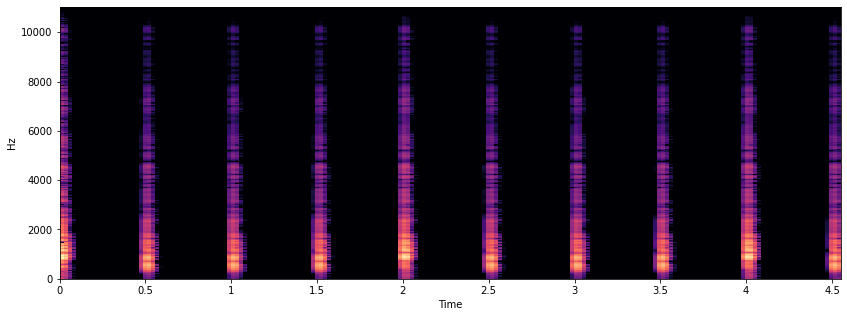

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

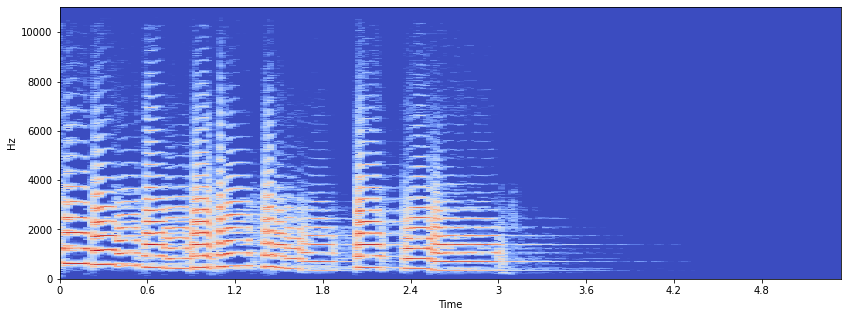

In [126]:
x, sr = librosa.load(librosa.example('trumpet'))
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

## Musical scores try to capture the structure of music in writing

## Analytical Interlude I (Analyzing Nicolas Collins's _Broken Light_ (1992))

## Other sources of data about music

- implicit data (skips etc.)
- collaborative filtering [interesting paper - 4S?- I've forgotten about here]
- discography
- text
- motion (video, mocap)
- breathing (Finn Upham)

## Useful resources

### Python modules

### Learning

## Lab tasks

### 1. Write your own onset detector

- scoring
- parameter search

### 2. @DLEveryFriday

Every Friday since X, David Lynch has posted a video message.

download gallery
audalign

https://pypi.org/project/audalign/